# Imports

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd

## Open Datasets

In [2]:
from itertools import zip_longest
def get_all_data():
    positive_words = []
    negative_words = []
    for word in open('positive_words.txt', 'r',encoding = "ISO-8859-1").readlines()[35:]:
     positive_words.append([word.rstrip(), 1])
    for word in open('negative_words.txt', 'r', encoding = "ISO-8859-1").readlines()[35:]:
     negative_words.append([word.rstrip(), 0])
    data = positive_words + negative_words
#     data = []
#     [data.append(row1) if len(data)%2==0 and row1 !=None else data.append(row2) for (row1,row2) in zip_longest(positive_words,negative_words)]
#     # [data.remove(row) for row in data if row==None]
    return data
data = get_all_data()
# [data.remove(row) for row in data if row==None]
print(data[0])
print(data[1])
print(data[3])
print(data[100000])

['admiringly', 1]
['adorable', 1]
['adored', 1]
['wat', 1]


## Training Step

In [3]:
def training_step(data, vectorizer):
    training_text = [data[0] for data in data]
    training_result = [data[1] for data in data]

    training_text = vectorizer.fit_transform(training_text)

    return BernoulliNB().fit(training_text, training_result)

## Score Step

In [4]:
# training_data, evaluation_data = preprocessing_step()
vectorizer = CountVectorizer(binary = 'true')
classifier = training_step(get_all_data(), vectorizer)
result = classifier.predict(vectorizer.transform(["I love this movie!"]))

result[0]

1

In [5]:
def analyse_text(classifier, vectorizer, text):
    return text, classifier.predict(vectorizer.transform([text]))

new_result = analyse_text(classifier, vectorizer, "Best product ever")
new_result

('Best product ever', array([1]))

In [6]:
def print_result(result):
    text, analysis_result = result
    print_text = "Positive" if analysis_result[0] == 1 else "Negative"
    print(text, ":", print_text)
    
print_result(new_result)

Best product ever : Positive


### More examples

In [7]:
print_result( analyse_text(classifier, vectorizer,"this is the best movie"))
print_result( analyse_text(classifier, vectorizer,"this is the worst movie"))
print_result( analyse_text(classifier, vectorizer,"awesome!"))
print_result( analyse_text(classifier, vectorizer,"10/10"))
print_result( analyse_text(classifier, vectorizer,"so bad"))
print_result( analyse_text(classifier, vectorizer,"nice"))

this is the best movie : Positive
this is the worst movie : Negative
awesome! : Positive
10/10 : Positive
so bad : Negative
nice : Positive


In [8]:
stopwords = ["wouldn't", 'own', 'ours', 'under', "who's", 'also', "here's", 'could', 'have', 'but', 'com', 'ourselves', "where's", 'at', "they'd", 'hence', 'doing', "you're", "how's", 'r', 'yours', 'against', 'same', "i'd", 'which', 'more', 'very', 'whom', 'ought', 'http', 'for', 'was', 'most', 'of', 'his', 'are', 'so', 'did', 'am', "she'll", 'been', 'up', 'does', 'after', 'few', 'until', "they're", 'it', 'both', 'their', 'the', "there's", "can't", 'into', "he's", 'they', 'through', "why's", 'get', 'all', 'them', 'herself', "we'll", 'if', 'can', 'out', "i'm", 'and', 'because', "it's", "they've", "isn't", 'were', 'some', 'than', "wasn't", 'too', "that's", "they'll", 'that', "haven't", 'such', "i've", 'while', 'why', 'like', 'should', 'to', "you'll", 'hers', 'you', 'then', 'however', 'down', 'before', "she's", 'any', "what's", "he'd", 'here', 'www', "didn't", "you've", 'cannot', 'above', 'her', 'from', "shan't", "you'd", 'yourselves', 'an', "aren't", 'only', 'theirs', "we'd", 'on', 'having', 'each', 'else', 'who', 'or', "i'll", 'had', 'as', "mustn't", "couldn't", "weren't", 'me', 'further', 'over', 'where', 'when', 'no', 'being', "she'd", 'about', 'those', 'in', 'she', "when's", 'has', 'its', 'how', "don't", "hadn't", 'just', "we're", 'him', 'himself', 'once', 'he', 'since', 'again', 'my', 'this', "we've", 'off', 'would', 'not', 'these', 'your', 'therefore', 'themselves', 'our', 'is', 'between', 'ever', "won't", "he'll", 'i', 'do', "let's", 'with', "hasn't", 'k', 'otherwise', "doesn't", 'we', 'by', 'itself', 'shall', 'be', "shouldn't", 'below', 'during', 'myself', 'nor', 'what', 'other', 'there', 'yourself', 'a', 'mightn', 'mustn', 't', "mightn't", 'haven', 'don', 'isn', 's', 'wouldn', 'will', 'needn', 'hadn', 'll', 'couldn', 'aren', 'wasn', 'ain', 'm', 'didn', 'won', "that'll", "should've", "needn't", 're', 'o', 'doesn', 've', 'y', 'ma', 'now', 'd', 'shan', 'shouldn', 'hasn', 'weren']

In [9]:
import re,csv
def get_evaluation_data(file):
    evaluation_data = []
    with open(file,'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            words = " ".join([word for word in (re.findall(r"[\w']+|[.,!?;]", row['text'].rstrip())) if len(word) >= 3 and word not in stopwords])
            if row['sentiment'] == 'Positive':
                evaluation_data.append([words,1])
            else:
                evaluation_data.append([words,0])
    #         # print(words)
    #         if row['sentiment'] == 'Negative':
    #             # print(words)
    #             [neg_file.write(word+'\n') for word in words]
    #             elif row['sentiment'] == 'Positive':
    #                 [pos_file.write(word+'\n') for word in words
    return evaluation_data
print(get_evaluation_data('Sentiment.csv'))

[['NancyLeeGrahn How everyone feel Climate Change question last night Exactly GOPDebate', 0], ["ScottWalker Didn't catch full GOPdebate last night Here Scott's best lines seconds Walker16 ZSfF", 1], ['TJMShow mention Tamir Rice GOPDebate held Cleveland Wow', 0], ['RobGeorge That Carly Fiorina trending hours HER debate men completed GOPdebate says', 1], ['DanScavino GOPDebate realDonaldTrump delivered highest ratings history presidential debates Trump2016', 1], ['GregAbbott_TX TedCruz first day rescind every illegal executive action taken Barack Obama GOPDebate FoxNews', 1], ['warriorwoman91 liked happy heard going moderator Not anymore GOPDebate megynkelly https', 0], ['Going MSNBC Live ThomasARoberts around GOPDebate', 0], ['Deer headlights lizzwinstead Ben Carson may brain surgeon performed lobotomy GOPDebate', 0], ["NancyOsborne180 Last night's debate proved GOPDebate BATsAsk BadassTeachersA TBATs https G2gGjY1bJD", 0], ['JGreenDC realDonaldTrump fairness BillClinton owns phrase GOP

In [12]:
len(get_evaluation_data('Sentiment.csv'))

13871

## Evaluation Step

In [10]:
def simple_evaluation(evaluation_data):
    evaluation_text     = [evaluation_data[0] for evaluation_data in evaluation_data]
    evaluation_result   = [evaluation_data[1] for evaluation_data in evaluation_data]

    total = len(evaluation_text)
    corrects = 0
    for index in range(0, total):
        analysis_result = analyse_text(classifier, vectorizer, evaluation_text[index])
        text, result = analysis_result
        corrects += 1 if result[0] == evaluation_result[index] else 0

    return corrects * 100 / total

simple_evaluation(get_evaluation_data('Sentiment.csv'))

50.544301059764976

### Confusion Matrix

In [11]:
def create_confusion_matrix(evaluation_data):
    evaluation_text     = [evaluation_data[0] for evaluation_data in evaluation_data]
    actual_result       = [evaluation_data[1] for evaluation_data in evaluation_data]
    prediction_result   = []
    for text in evaluation_text:
        analysis_result = analyse_text(classifier, vectorizer, text)
        prediction_result.append(analysis_result[1][0])
    
    matrix = confusion_matrix(actual_result, prediction_result)
    return matrix
    
confusion_matrix_result = create_confusion_matrix(get_evaluation_data('Sentiment.csv'))

## Data Frame

In [103]:
pandas.DataFrame(confusion_matrix_result, columns=["Negatives", "Positives"],index=["Negatives", "Positives"])

,Negatives,Positives
Negatives,11124,511
Positives,1013,1223


### Plot Confusion Matrix

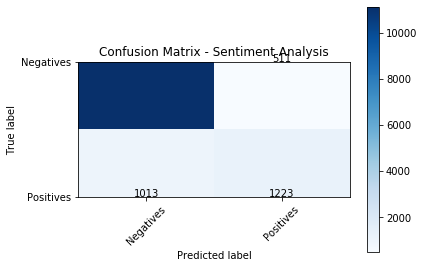

In [104]:
classes = ["Negatives", "Positives"]

plt.figure()
plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Sentiment Analysis")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

text_format = 'd'
thresh = confusion_matrix_result.max() / 2.
for row, column in itertools.product(range(confusion_matrix_result.shape[0]), range(confusion_matrix_result.shape[1])):
    plt.text(column, row, format(confusion_matrix_result[row, column], text_format),
             horizontalalignment="center",
             color="white" if confusion_matrix_result[row, column] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

In [105]:
true_negatives = confusion_matrix_result[0][0]
false_negatives = confusion_matrix_result[0][1]
false_positives = confusion_matrix_result[1][0]
true_positives = confusion_matrix_result[1][1]

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2*(recall * precision) / (recall + precision)

print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 Score:',f1_score)

Accuracy: 0.8901304880686324
Precision: 0.5469588550983899
Recall: 0.7053056516724336
F1 Score: 0.6161209068010075
